<h1>Imporing Essential Liberaries & Dataset</h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/home/anurag/Documents/zbasic/Projects-main/data//data.csv")

<h1>Data Exploration</h1>

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.drop(columns =['Unnamed: 32','id'], inplace=True)

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_cols = df.select_dtypes(include = ['int64','float64'])

In [10]:
for col in num_cols:
    print(f'{col}: {df[col].skew()}')

radius_mean: 0.9423795716730992
texture_mean: 0.6504495420828159
perimeter_mean: 0.9906504253930081
area_mean: 1.6457321756240424
smoothness_mean: 0.45632376481955844
compactness_mean: 1.1901230311980404
concavity_mean: 1.4011797389486722
concave points_mean: 1.1711800812336282
symmetry_mean: 0.7256089733641999
fractal_dimension_mean: 1.3044888125755076
radius_se: 3.0886121663847574
texture_se: 1.646443808753053
perimeter_se: 3.443615202194899
area_se: 5.447186284898394
smoothness_se: 2.314450056636759
compactness_se: 1.9022207096378565
concavity_se: 5.110463049043661
concave points_se: 1.4446781446974786
symmetry_se: 2.1951328995478216
fractal_dimension_se: 3.923968620227413
radius_worst: 1.1031152059604372
texture_worst: 0.49832130948716474
perimeter_worst: 1.1281638713683722
area_worst: 1.8593732724433467
smoothness_worst: 0.4154259962824678
compactness_worst: 1.4735549003297956
concavity_worst: 1.1502368219460262
concave points_worst: 0.49261552688550875
symmetry_worst: 1.433927765

In [11]:
df_clean = df.copy()

for col in num_cols:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

In [12]:
features_to_transform = [
    'radius_se', 'perimeter_se', 'area_se', 'fractal_dimension_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'fractal_dimension_worst',
    'area_worst', 'perimeter_worst'
]

# Threshold for skewness
skew_threshold = 1

for feature in features_to_transform:
    skewness = df_clean[feature].skew()
    if abs(skewness) > skew_threshold:
        # Checking for non-positive values before log transform
        if (df_clean[feature] <= 0).any():
            min_value = df_clean[feature].min()
            shift_value = abs(min_value) + 1e-5 
            df_clean[feature] = np.log(df_clean[feature] + shift_value)
            print(f"Applied log transform to {feature} after shifting by {shift_value}")
        else:
            df_clean[feature] = np.log(df_clean[feature])
            print(f"Applied log transform to {feature}")
    else:
        print(f"No transformation needed for {feature} (skewness {skewness:.2f})")

Applied log transform to radius_se
Applied log transform to perimeter_se
Applied log transform to area_se
Applied log transform to fractal_dimension_se
Applied log transform to smoothness_se
Applied log transform to compactness_se
Applied log transform to concavity_se after shifting by 1e-05
Applied log transform to fractal_dimension_worst
Applied log transform to area_worst
No transformation needed for perimeter_worst (skewness 0.94)


In [13]:
for col in num_cols:
    print(f'{col}: {df_clean[col].skew()}')

radius_mean: 0.7875323140608768
texture_mean: 0.4522094876606619
perimeter_mean: 0.7940337838902266
area_mean: 1.1849790068621548
smoothness_mean: 0.174485183495248
compactness_mean: 0.7001692145222386
concavity_mean: 1.0436318966053573
concave points_mean: 0.9724426936221957
symmetry_mean: 0.38876814805814336
fractal_dimension_mean: 0.6388492176741839
radius_se: 0.48341570155953656
texture_se: 0.9562185909973044
perimeter_se: 0.4540915665226401
area_se: 0.6976891763772344
smoothness_se: 0.35009900490370943
compactness_se: -0.04189873640038301
concavity_se: -3.6414107152257906
concave points_se: 0.6545168444942181
symmetry_se: 1.163674511052491
fractal_dimension_se: 0.22484736472015193
radius_worst: 0.9702461712622833
texture_worst: 0.24734432863219938
perimeter_worst: 0.9423996727769505
area_worst: 0.5055524132967222
smoothness_worst: 0.246762390713898
compactness_worst: 1.0342879392166517
concavity_worst: 0.8367655211862045
concave points_worst: 0.4297259003272976
symmetry_worst: 0.9

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


for col in num_cols:
    df_clean[col] = scaler.fit_transform(df_clean[[col]])
    print(f"Scaled {col}")

Scaled radius_mean
Scaled texture_mean
Scaled perimeter_mean
Scaled area_mean
Scaled smoothness_mean
Scaled compactness_mean
Scaled concavity_mean
Scaled concave points_mean
Scaled symmetry_mean
Scaled fractal_dimension_mean
Scaled radius_se
Scaled texture_se
Scaled perimeter_se
Scaled area_se
Scaled smoothness_se
Scaled compactness_se
Scaled concavity_se
Scaled concave points_se
Scaled symmetry_se
Scaled fractal_dimension_se
Scaled radius_worst
Scaled texture_worst
Scaled perimeter_worst
Scaled area_worst
Scaled smoothness_worst
Scaled compactness_worst
Scaled concavity_worst
Scaled concave points_worst
Scaled symmetry_worst
Scaled fractal_dimension_worst


In [15]:
df_clean['diagnosis_binary'] = df_clean['diagnosis'].map({'B': 0, 'M': 1})

# Define features and target
X = df_clean.drop(['diagnosis', 'diagnosis_binary'], axis=1)  # drop original diagnosis if not needed
y = df_clean['diagnosis_binary']

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.97      0.97      0.97        32

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89

Accuracy Score: 0.9775280898876404
ROC AUC Score: 0.9983552631578947


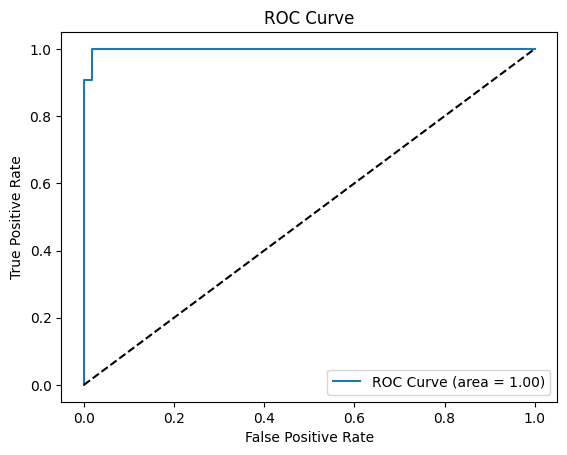

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probability for ROC AUC

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')  # random predictions line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Best parameters: {'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.91      0.95        32

    accuracy                           0.97        89
   macro avg       0.97      0.95      0.96        89
weighted avg       0.97      0.97      0.97        89

Accuracy Score: 0.9662921348314607
ROC AUC Score: 0.9961622807017545


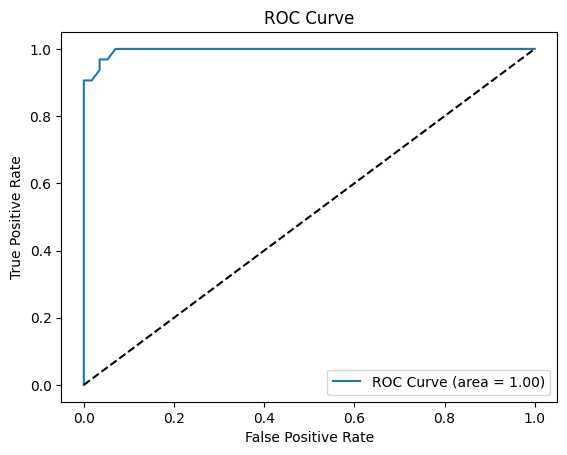

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
knn = KNeighborsClassifier()

# Define hyperparameter grid to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13,15,17,19,21,23,24,26,27,29],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator
best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.96      0.84      0.90        32

    accuracy                           0.93        89
   macro avg       0.94      0.91      0.92        89
weighted avg       0.93      0.93      0.93        89

Accuracy Score: 0.9325842696629213
ROC AUC Score: 0.9435307017543859


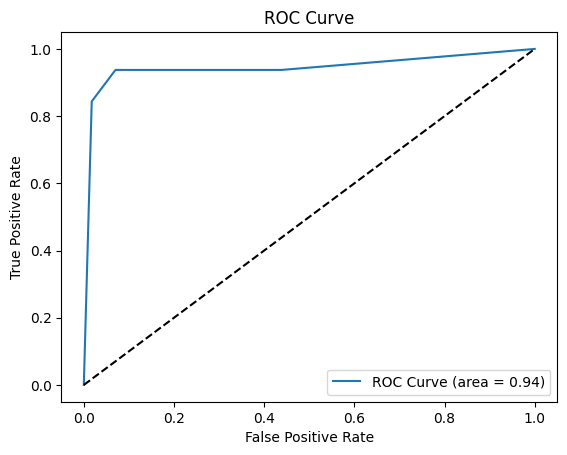

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.97      0.91      0.94        32

    accuracy                           0.96        89
   macro avg       0.96      0.94      0.95        89
weighted avg       0.96      0.96      0.95        89

Accuracy Score: 0.9550561797752809
ROC AUC Score: 0.993421052631579


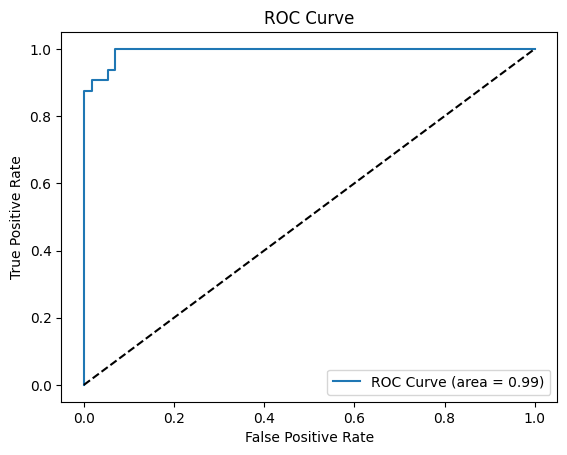

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        57
           1       0.91      1.00      0.96        32

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.96        89
weighted avg       0.97      0.97      0.97        89

Accuracy Score: 0.9662921348314607
ROC AUC Score: 0.9945175438596492


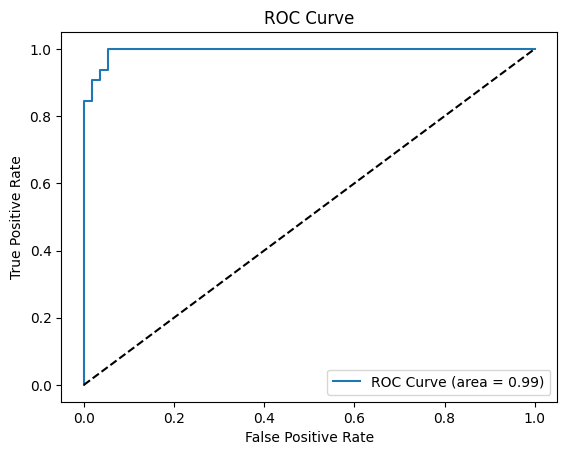

Exception ignored in: <function ResourceTracker.__del__ at 0x7f8ddc55e020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f0cbce66020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f4aa0e66020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

In [20]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    xgb_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Project Report: Breast Cancer Classification

1. Dataset Overview
The dataset used in this project pertains to breast cancer diagnosis, with the primary target variable being diagnosis, categorized as B (Benign) and M (Malignant). The dataset comprised mostly numerical features, with the exception of the diagnosis label.

2. Data Exploration and Preprocessing  

    Initial Exploration: Conducted data exploration using isnull(), duplicated(), info(), describe(), and head() to understand data structure and identify missing values or duplicates.
    Outlier Detection: Outliers were identified and removed using the Interquartile Range (IQR) method.
    Skewness Handling: Checked skewness for numerical features; applied log transformation to correct skewness and validated the effectiveness post-transformation.
    Feature Scaling: Transformed numerical columns using StandardScaler to normalize feature ranges.

3. Model Training and Evaluation
Four different classification algorithms were employed:

    Logistic Regression:

   
        Achieved an accuracy of approximately 97.75%
        ROC AUC score of 0.998
        Performance metrics indicate high precision, recall, and F1-score for both classes.

    K-Nearest Neighbors (KNN):

   
        Best parameters: n_neighbors=23, p=2, weights='uniform'
        Accuracy of 96.63%
        ROC AUC of 0.996

    Decision Tree:

   
        Best parameters: criterion='entropy', max_depth=3, min_samples_leaf=4
        Accuracy of 93.25%
        ROC AUC of 0.944

    Random Forest:

   
        Best parameters: n_estimators=200, max_features='log2', min_samples_leaf=2
        Accuracy of 95.51%
        ROC AUC of 0.993

    XGBoost:

   
        Best parameters: n_estimators=100, max_depth=3, learning_rate=0.2
        Accuracy of 96.63%
        ROC AUC of 0.995

5. Comparative Analysis
All models demonstrated strong performance, with Logistic Regression and XGBoost yielding the highest accuracy and ROC AUC scores. The results indicate that these models are highly effective in distinguishing between benign and malignant tumors.

6. Conclusion
The project successfully implemented a comprehensive data exploration, preprocessing, and modeling pipeline for breast cancer classification. The models achieved high accuracy and ROC AUC scores, suggesting reliable predictive performance. Logistic Regression and XGBoost emerged as the top-performing algorithms, suitable for deployment in diagnostic support systems. Future work could involve feature importance analysis, ensemble methods, and validation on external datasets to further enhance model robustness.